In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Libraries imported successfully!")

Libraries imported successfully!


In [6]:
# Load the California Housing dataset
df = pd.read_csv('../data/Data_Sets.csv', delimiter=';')

print("✓ Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

✓ Dataset loaded successfully!
Shape: 20640 rows × 10 columns


In [ ]:
# Display first 10 rows to understand the data structure
print("First 10 rows of the dataset:")
df.head(10)

df

In [8]:
# Check last rows to ensure data consistency
print("Last 20 rows of the dataset:")
df.tail(20)


Last 20 rows of the dataset:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20620,-121.48,39.05,40.0,198.0,41.0,151.0,48.0,4.5625,100000.0,INLAND
20621,-121.47,39.01,37.0,1244.0,247.0,484.0,157.0,2.3661,77500.0,INLAND
20622,-121.44,39.00,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0,INLAND
20623,-121.37,39.03,32.0,1158.0,244.0,598.0,227.0,2.8235,65500.0,INLAND
20624,-121.41,39.04,16.0,1698.0,300.0,731.0,291.0,3.0739,87200.0,INLAND
20625,-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.1250,72000.0,INLAND
20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,INLAND
20627,-121.32,39.13,5.0,358.0,65.0,169.0,59.0,3.0000,162500.0,INLAND
20628,-121.48,39.10,19.0,2043.0,421.0,1018.0,390.0,2.5952,92400.0,INLAND
20629,-121.39,39.12,28.0,10035.0,1856.0,6912.0,1818.0,2.0943,108300.0,INLAND


In [9]:
# Get detailed information about columns and data types
print("Dataset Information:")
print("=" * 60)
df.info()


Dataset Information:
<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  str    
dtypes: float64(9), str(1)
memory usage: 1.6 MB


In [10]:
# Identify missing values
print("Missing Values Analysis:")
print("=" * 60)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_info = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing.values,
    'Percentage': missing_pct.values.round(2)
})

# Show only columns with missing values
missing_data = missing_info[missing_info['Missing_Count'] > 0]

if len(missing_data) > 0:
    print("⚠️  Columns with missing values:")
    print(missing_data.to_string(index=False))
else:
    print("✓ No missing values found!")


Missing Values Analysis:
⚠️  Columns with missing values:
        Column  Missing_Count  Percentage
total_bedrooms            207         1.0


In [11]:
# Statistical summary of numerical features
print("Statistical Summary:")
print("=" * 60)
df.describe().round(2)


Statistical Summary:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [13]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print(f"⚠️  Warning: {duplicates} duplicate rows found")
else:
    print("✓ No duplicate rows found")


Number of duplicate rows: 0
✓ No duplicate rows found


In [16]:
# Comprehensive data quality report
print("=" * 60)
print("DATA QUALITY SUMMARY REPORT")
print("=" * 60)

print(f"\n📊 Dataset Size:")
print(f"   - Total rows: {df.shape[0]:,}")
print(f"   - Total columns: {df.shape[1]}")

print(f"\n🔢 Feature Types:")
print(f"   - Numerical features: {df.select_dtypes(include=[np.number]).shape[1]}")
print(f"   - Categorical features: {df.select_dtypes(include=['object']).shape[1]}")

print(f"\n❌ Missing Data:")
total_missing = df.isnull().sum().sum()
if total_missing > 0:
    print(f"   - Total missing values: {total_missing}")
    print(f"   - Affected columns: {(df.isnull().sum() > 0).sum()}")
else:
    print(f"   - No missing values ✓")

print(f"\n🔄 Duplicates:")
print(f"   - Duplicate rows: {df.duplicated().sum()}")

print(f"\n✅ Data is ready for preprocessing step!")


DATA QUALITY SUMMARY REPORT

📊 Dataset Size:
   - Total rows: 20,640
   - Total columns: 10

🔢 Feature Types:
   - Numerical features: 9
   - Categorical features: 1

❌ Missing Data:
   - Total missing values: 207
   - Affected columns: 1

🔄 Duplicates:
   - Duplicate rows: 0

✅ Data is ready for preprocessing step!


C:\Users\chibr\AppData\Local\Temp\ipykernel_37052\1218528217.py:12: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  print(f"   - Categorical features: {df.select_dtypes(include=['object']).shape[1]}")


In [17]:
# Step 4: Data Preparation and Cleaning
print("=" * 70)
print("STEP 4: DATA PREPARATION AND CLEANING")
print("=" * 70)

# Separate features (X) and target (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

print(f"✓ Features (X): {X.shape}")
print(f"✓ Target (y): {y.shape}")
print(f"\nFeatures: {list(X.columns)}")


STEP 4: DATA PREPARATION AND CLEANING
✓ Features (X): (20640, 9)
✓ Target (y): (20640,)

Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']


In [18]:
from sklearn.model_selection import train_test_split

# Important: Split BEFORE any preprocessing to avoid data leakage
# Using stratified split based on median_income categories
# Create income categories for stratification
df['income_cat'] = pd.cut(df['median_income'],
                          bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                          labels=[1, 2, 3, 4, 5])

# Split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=df['income_cat']
)

print("✓ Train-Test Split Complete:")
print(f"   Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\n⚠️  Important: All preprocessing will fit on training data only!")


✓ Train-Test Split Complete:
   Training set: 16512 samples (80.0%)
   Test set: 4128 samples (20.0%)

⚠️  Important: All preprocessing will fit on training data only!


In [21]:
# Cell 13: Correlation Matrix - Original Features

import matplotlib.pyplot as plt
import seaborn as sns

print("="*70)
print("CORRELATION MATRIX ANALYSIS")
print("="*70)

# Select only numerical columns (exclude categorical)
numerical_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Display correlation matrix as dataframe (rounded for readability)
print("\nCorrelation Matrix (all numerical features):")
print(correlation_matrix.round(3))

# Focus on target variable correlations
print("\n" + "="*70)
print("CORRELATIONS WITH TARGET (median_house_value)")
print("="*70)

target_corr = correlation_matrix['median_house_value'].sort_values(ascending=False)
print(target_corr)

# Interpret correlations
print("\n📊 Interpretation:")
for feature, corr_value in target_corr.items():
    if feature == 'median_house_value':
        continue
    
    if abs(corr_value) > 0.5:
        strength = "Strong"
    elif abs(corr_value) > 0.3:
        strength = "Moderate"
    else:
        strength = "Weak"
    
    direction = "positive" if corr_value > 0 else "negative"
    
    print(f"  {feature:20} → {corr_value:+.3f} ({strength} {direction})")


CORRELATION MATRIX ANALYSIS

Correlation Matrix (all numerical features):
                    longitude  latitude  housing_median_age  total_rooms  \
longitude               1.000    -0.925              -0.108        0.045   
latitude               -0.925     1.000               0.011       -0.036   
housing_median_age     -0.108     0.011               1.000       -0.361   
total_rooms             0.045    -0.036              -0.361        1.000   
total_bedrooms          0.070    -0.067              -0.320        0.930   
population              0.100    -0.109              -0.296        0.857   
households              0.055    -0.071              -0.303        0.918   
median_income          -0.015    -0.080              -0.119        0.198   
median_house_value     -0.046    -0.144               0.106        0.134   

                    total_bedrooms  population  households  median_income  \
longitude                    0.070       0.100       0.055         -0.015   
latitude   

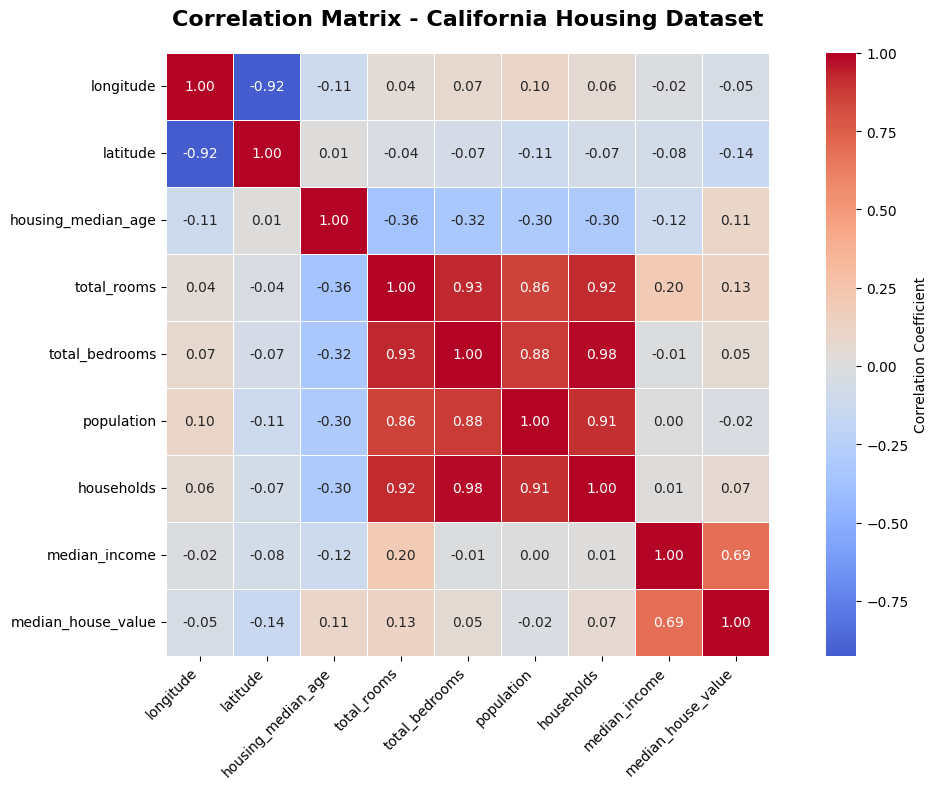

✓ Correlation heatmap generated


In [22]:
# Cell 14: Correlation Heatmap Visualization

plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True,           # Show correlation values
            fmt='.2f',            # Format to 2 decimal places
            cmap='coolwarm',      # Color scheme (red=positive, blue=negative)
            center=0,             # Center colormap at 0
            square=True,          # Make cells square-shaped
            linewidths=0.5,       # Add gridlines
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix - California Housing Dataset', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("✓ Correlation heatmap generated")


Creating scatter matrix for key features...
Selected features: ['median_income', 'median_house_value', 'total_rooms', 'housing_median_age', 'latitude', 'population']


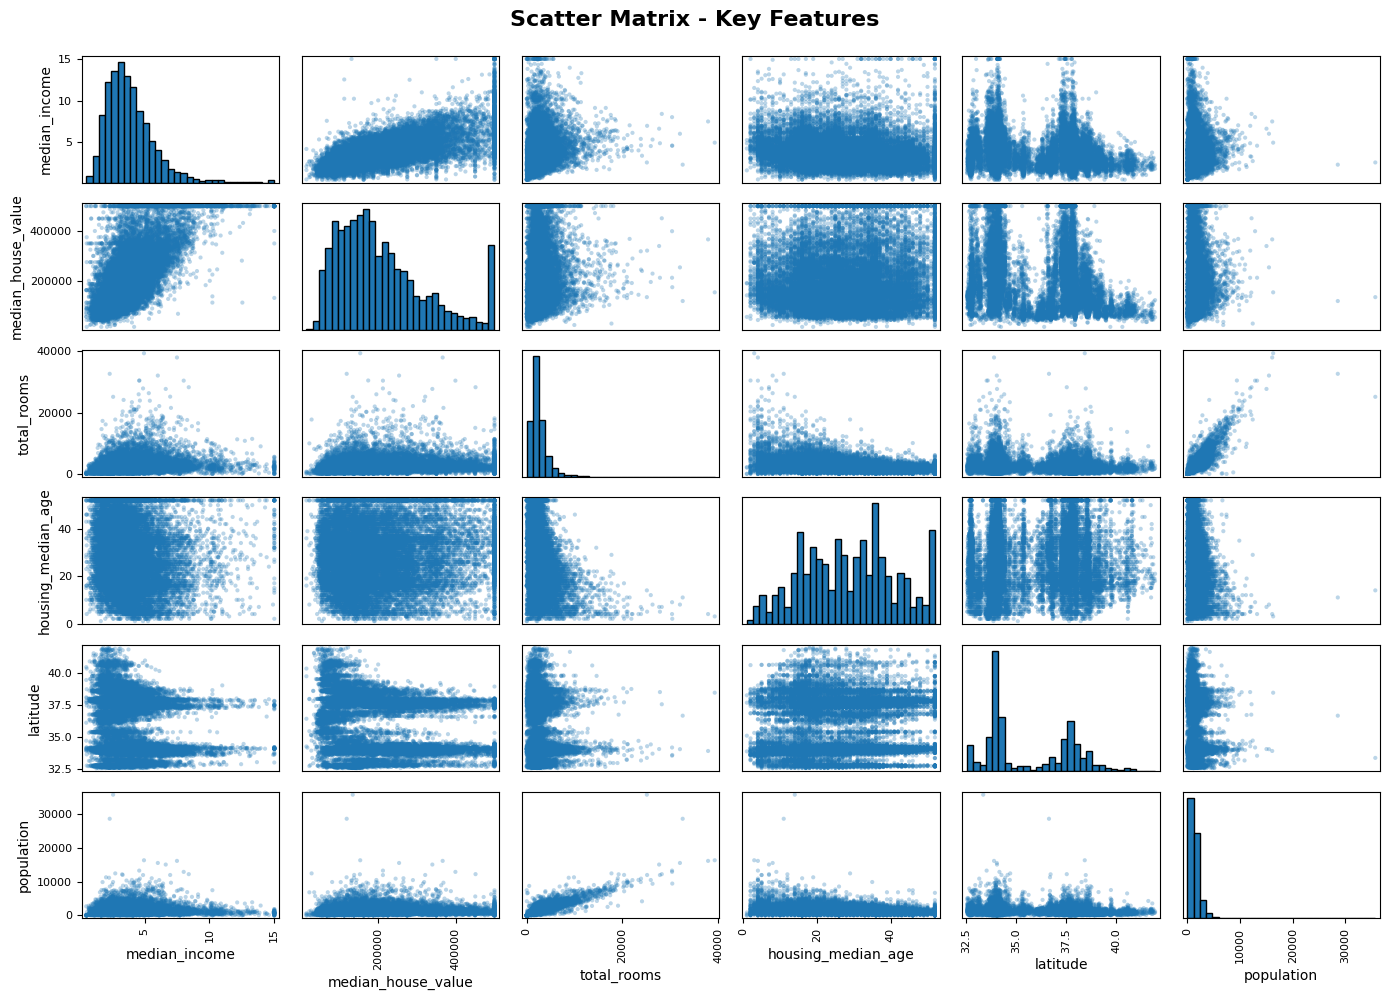

✓ Scatter matrix generated


In [23]:
# Cell 15: Scatter Matrix - Most Correlated Features

from pandas.plotting import scatter_matrix

# Select the most important features based on correlation with target
# Include median_income (strongest), and a few others
key_features = ['median_income', 'median_house_value', 
                'total_rooms', 'housing_median_age', 
                'latitude', 'population']

print("Creating scatter matrix for key features...")
print(f"Selected features: {key_features}")

# Create scatter matrix
fig = scatter_matrix(df[key_features], 
                     figsize=(14, 10),
                     diagonal='hist',     # Show histograms on diagonal
                     alpha=0.3,           # Transparency
                     hist_kwds={'bins': 30, 'edgecolor': 'black'})

plt.suptitle('Scatter Matrix - Key Features', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✓ Scatter matrix generated")


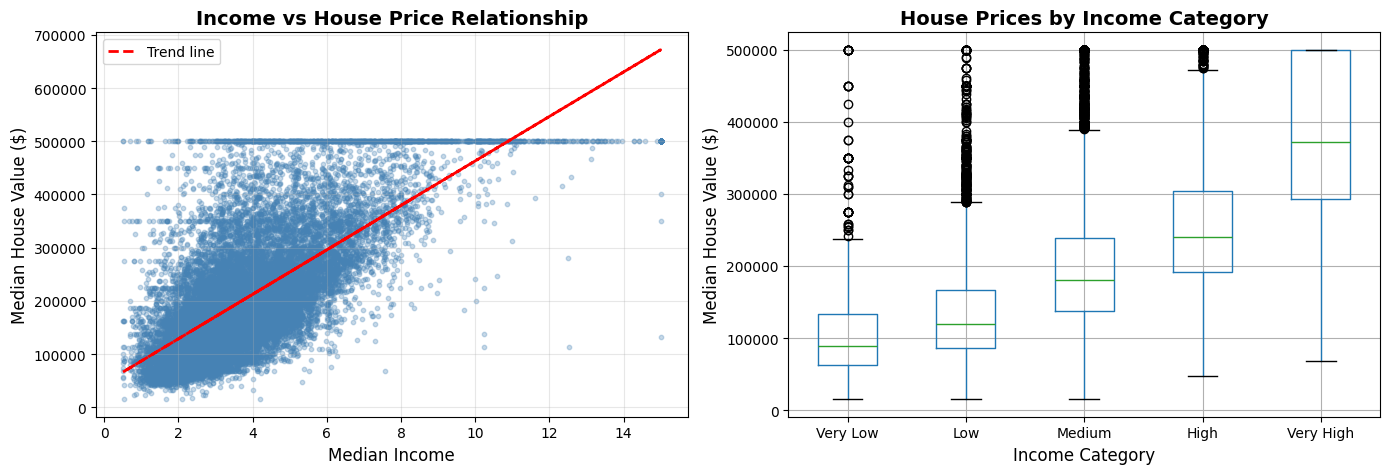

✓ Detailed correlation analysis complete

📌 Key Finding: median_income explains ~47% of house price variance
   (R² = 0.473)


In [24]:
# Cell 16: Focus on Strongest Predictor (median_income)

# Since median_income has the strongest correlation (0.688)
# Let's visualize this relationship in detail

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot: median_income vs median_house_value
axes[0].scatter(df['median_income'], df['median_house_value'], 
                alpha=0.3, s=10, color='steelblue')
axes[0].set_xlabel('Median Income', fontsize=12)
axes[0].set_ylabel('Median House Value ($)', fontsize=12)
axes[0].set_title('Income vs House Price Relationship', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['median_income'].dropna(), 
               df['median_house_value'].dropna(), 1)
p = np.poly1d(z)
axes[0].plot(df['median_income'], p(df['median_income']), 
             "r--", linewidth=2, label=f'Trend line')
axes[0].legend()

# Box plot by income categories
df['income_category'] = pd.cut(df['median_income'], 
                                bins=[0, 1.5, 3, 4.5, 6, np.inf],
                                labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

df.boxplot(column='median_house_value', by='income_category', ax=axes[1])
axes[1].set_xlabel('Income Category', fontsize=12)
axes[1].set_ylabel('Median House Value ($)', fontsize=12)
axes[1].set_title('House Prices by Income Category', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

# Clean up temporary column
df.drop('income_category', axis=1, inplace=True)

print("✓ Detailed correlation analysis complete")
print(f"\n📌 Key Finding: median_income explains ~47% of house price variance")
print(f"   (R² = {0.688**2:.3f})")


In [27]:
# Cell 17: Feature Categorization and Analysis

print("="*70)
print("FEATURE CATEGORIZATION")
print("="*70)

# Categorize features by type and purpose
feature_categories = {
    'Geographic Features': ['longitude', 'latitude'],
    'Housing Characteristics': ['housing_median_age', 'total_rooms', 'total_bedrooms'],
    'Population Features': ['population', 'households'],
    'Economic Features': ['median_income'],
    'Location Category': ['ocean_proximity'],
    'Target Variable': ['median_house_value']
}

print("\n📋 Feature Categories:\n")
for category, features in feature_categories.items():
    print(f"{category}:")
    for feature in features:
        if feature in df.columns:
            dtype = df[feature].dtype
            if dtype == 'object':
                unique = df[feature].nunique()
                print(f"  - {feature:25} (Categorical, {unique} categories)")
            else:
                print(f"  - {feature:25} (Numerical)")
    print()

# Correlation strength categorization
print("="*70)
print("CORRELATION STRENGTH CATEGORIES")
print("="*70)

numerical_cols = df.select_dtypes(include=[np.number]).columns
target_corr = df[numerical_cols].corr()['median_house_value'].drop('median_house_value')

# Categorize by correlation strength
strong_positive = target_corr[target_corr >= 0.5].sort_values(ascending=False)
moderate_positive = target_corr[(target_corr >= 0.3) & (target_corr < 0.5)].sort_values(ascending=False)
weak_positive = target_corr[(target_corr > 0) & (target_corr < 0.3)].sort_values(ascending=False)
weak_negative = target_corr[(target_corr < 0) & (target_corr > -0.3)].sort_values(ascending=False)
moderate_negative = target_corr[(target_corr <= -0.3) & (target_corr > -0.5)].sort_values(ascending=False)
strong_negative = target_corr[target_corr <= -0.5].sort_values(ascending=False)

print("\n🟢 STRONG Positive Correlation (≥ 0.5):")
if len(strong_positive) > 0:
    for feat, corr in strong_positive.items():
        print(f"   {feat:25} → {corr:+.3f}")
else:
    print("   None")

print("\n🔵 MODERATE Positive Correlation (0.3 to 0.5):")
if len(moderate_positive) > 0:
    for feat, corr in moderate_positive.items():
        print(f"   {feat:25} → {corr:+.3f}")
else:
    print("   None")

print("\n⚪ WEAK Positive Correlation (0 to 0.3):")
if len(weak_positive) > 0:
    for feat, corr in weak_positive.items():
        print(f"   {feat:25} → {corr:+.3f}")
else:
    print("   None")

print("\n⚪ WEAK Negative Correlation (0 to -0.3):")
if len(weak_negative) > 0:
    for feat, corr in weak_negative.items():
        print(f"   {feat:25} → {corr:+.3f}")
else:
    print("   None")

print("\n🔴 MODERATE Negative Correlation (-0.3 to -0.5):")
if len(moderate_negative) > 0:
    for feat, corr in moderate_negative.items():
        print(f"   {feat:25} → {corr:+.3f}")
else:
    print("   None")

print("\n🟥 STRONG Negative Correlation (≤ -0.5):")
if len(strong_negative) > 0:
    for feat, corr in strong_negative.items():
        print(f"   {feat:25} → {corr:+.3f}")
else:
    print("   None")

# Feature importance summary
print("\n" + "="*70)
print("FEATURE QUALITY ASSESSMENT")
print("="*70)

print("\n✓ High-value features (strong predictors):")
print(f"   • median_income (r = {target_corr['median_income']:.3f})")
print("     → Primary predictor, explains ~47% of variance")

print("\n⚠️  Low-value features (weak individual predictors):")
for feat in ['total_rooms', 'total_bedrooms', 'population', 'households']:
    print(f"   • {feat:20} (r = {target_corr[feat]:+.3f})")
print("     → Raw counts lack context")
print("     → Need feature engineering (ratios)")

print("\n⚠️  Multicollinearity detected:")
print("   • total_rooms ↔ total_bedrooms (r = 0.93)")
print("   • total_rooms ↔ households (r = 0.92)")
print("   • population ↔ households (r = 0.91)")
print("     → These features provide redundant information")
print("     → Solution: Create ratio features instead")

# Decision for feature engineering
print("\n" + "="*70)
print("FEATURE ENGINEERING STRATEGY")
print("="*70)

print("""
Based on correlation analysis, we will:

1. KEEP as-is:
   ✓ median_income (strongest predictor)
   ✓ longitude, latitude (for spatial patterns)
   ✓ housing_median_age (temporal information)
   ✓ ocean_proximity (location context)

2. TRANSFORM with ratios (reduce multicollinearity):
   ➜ total_rooms → rooms_per_household
   ➜ total_bedrooms → bedrooms_per_room
   ➜ population → population_per_household
   
3. REASON:
   • Ratios capture density and quality, not just size
   • Reduces 4 correlated features to 3 independent ones
   • Should improve correlation with target
""")

print("\n✓ Ready for feature engineering!")


FEATURE CATEGORIZATION

📋 Feature Categories:

Geographic Features:
  - longitude                 (Numerical)
  - latitude                  (Numerical)

Housing Characteristics:
  - housing_median_age        (Numerical)
  - total_rooms               (Numerical)
  - total_bedrooms            (Numerical)

Population Features:
  - population                (Numerical)
  - households                (Numerical)

Economic Features:
  - median_income             (Numerical)

Location Category:
  - ocean_proximity           (Numerical)

Target Variable:
  - median_house_value        (Numerical)

CORRELATION STRENGTH CATEGORIES

🟢 STRONG Positive Correlation (≥ 0.5):
   median_income             → +0.688

🔵 MODERATE Positive Correlation (0.3 to 0.5):
   None

⚪ WEAK Positive Correlation (0 to 0.3):
   total_rooms               → +0.134
   housing_median_age        → +0.106
   households                → +0.066
   total_bedrooms            → +0.050

⚪ WEAK Negative Correlation (0 to -0.3):
   po

In [28]:
# Cell 18: Feature Engineering - Create Ratio Features

print("="*70)
print("FEATURE ENGINEERING")
print("="*70)

# Create a copy for feature engineering
df_engineered = df.copy()

# Create new ratio features
print("\n🔧 Creating engineered features...")

df_engineered['rooms_per_household'] = df_engineered['total_rooms'] / df_engineered['households']
df_engineered['bedrooms_per_room'] = df_engineered['total_bedrooms'] / df_engineered['total_rooms']
df_engineered['population_per_household'] = df_engineered['population'] / df_engineered['households']

print("✓ New features created:")
print("  - rooms_per_household")
print("  - bedrooms_per_room")
print("  - population_per_household")

# Check for any inf or extreme values from division
print("\n📊 New feature statistics:")
new_features = ['rooms_per_household', 'bedrooms_per_room', 'population_per_household']
print(df_engineered[new_features].describe().round(3))

# Check for inf/NaN values (in case of division by zero)
print("\n🔍 Data quality check on engineered features:")
for feat in new_features:
    inf_count = np.isinf(df_engineered[feat]).sum()
    nan_count = df_engineered[feat].isna().sum()
    print(f"  {feat}:")
    print(f"    - Infinite values: {inf_count}")
    print(f"    - NaN values: {nan_count}")

# Replace any inf values with NaN (will be handled during imputation)
df_engineered.replace([np.inf, -np.inf], np.nan, inplace=True)

# Recalculate correlation with new features
print("\n" + "="*70)
print("UPDATED CORRELATIONS WITH TARGET (median_house_value)")
print("="*70)

numerical_df_new = df_engineered.select_dtypes(include=[np.number])
new_correlation = numerical_df_new.corr()['median_house_value'].sort_values(ascending=False)

print("\nAll feature correlations:")
for feat, corr in new_correlation.items():
    if feat != 'median_house_value':
        if abs(corr) >= 0.5:
            strength = "🟢 STRONG"
        elif abs(corr) >= 0.3:
            strength = "🔵 MODERATE"
        else:
            strength = "⚪ WEAK"
        print(f"  {feat:30} → {corr:+.3f} ({strength})")

# Compare improvements
print("\n" + "="*70)
print("FEATURE ENGINEERING IMPACT ANALYSIS")
print("="*70)

print("\n📈 Before vs After Comparison:\n")

comparisons = [
    ("total_rooms", "rooms_per_household"),
    ("total_bedrooms", "bedrooms_per_room"),
    ("population", "population_per_household")
]

for old_feat, new_feat in comparisons:
    old_corr = df[numerical_cols].corr()['median_house_value'][old_feat]
    new_corr = new_correlation[new_feat]
    improvement = new_corr - old_corr
    
    print(f"{old_feat:20} (r = {old_corr:+.3f})")
    print(f"  ↓ transformed to")
    print(f"{new_feat:20} (r = {new_corr:+.3f})")
    
    if abs(new_corr) > abs(old_corr):
        print(f"  ✓ IMPROVED by {abs(improvement):.3f}")
    else:
        print(f"  ⚠️  Decreased by {abs(improvement):.3f}")
    print()

# Summary
print("="*70)
print("SUMMARY")
print("="*70)

print(f"\nOriginal features: {len(df.columns)}")
print(f"After engineering: {len(df_engineered.columns)}")
print(f"New features added: {len(new_features)}")

print("\n✓ Feature engineering complete!")
print("✓ Dataset ready for preprocessing pipeline")

# Update working dataframe
df = df_engineered.copy()
print("\n✓ Working dataframe updated with engineered features")


FEATURE ENGINEERING

🔧 Creating engineered features...
✓ New features created:
  - rooms_per_household
  - bedrooms_per_room
  - population_per_household

📊 New feature statistics:
       rooms_per_household  bedrooms_per_room  population_per_household
count            20640.000          20433.000                 20640.000
mean                 5.429              0.213                     3.071
std                  2.474              0.058                    10.386
min                  0.846              0.100                     0.692
25%                  4.441              0.175                     2.430
50%                  5.229              0.203                     2.818
75%                  6.052              0.240                     3.282
max                141.909              1.000                  1243.333

🔍 Data quality check on engineered features:
  rooms_per_household:
    - Infinite values: 0
    - NaN values: 0
  bedrooms_per_room:
    - Infinite values: 0
    - NaN v

CORRELATION MATRIX - WITH ENGINEERED FEATURES

Correlations with median_house_value (sorted):
median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64



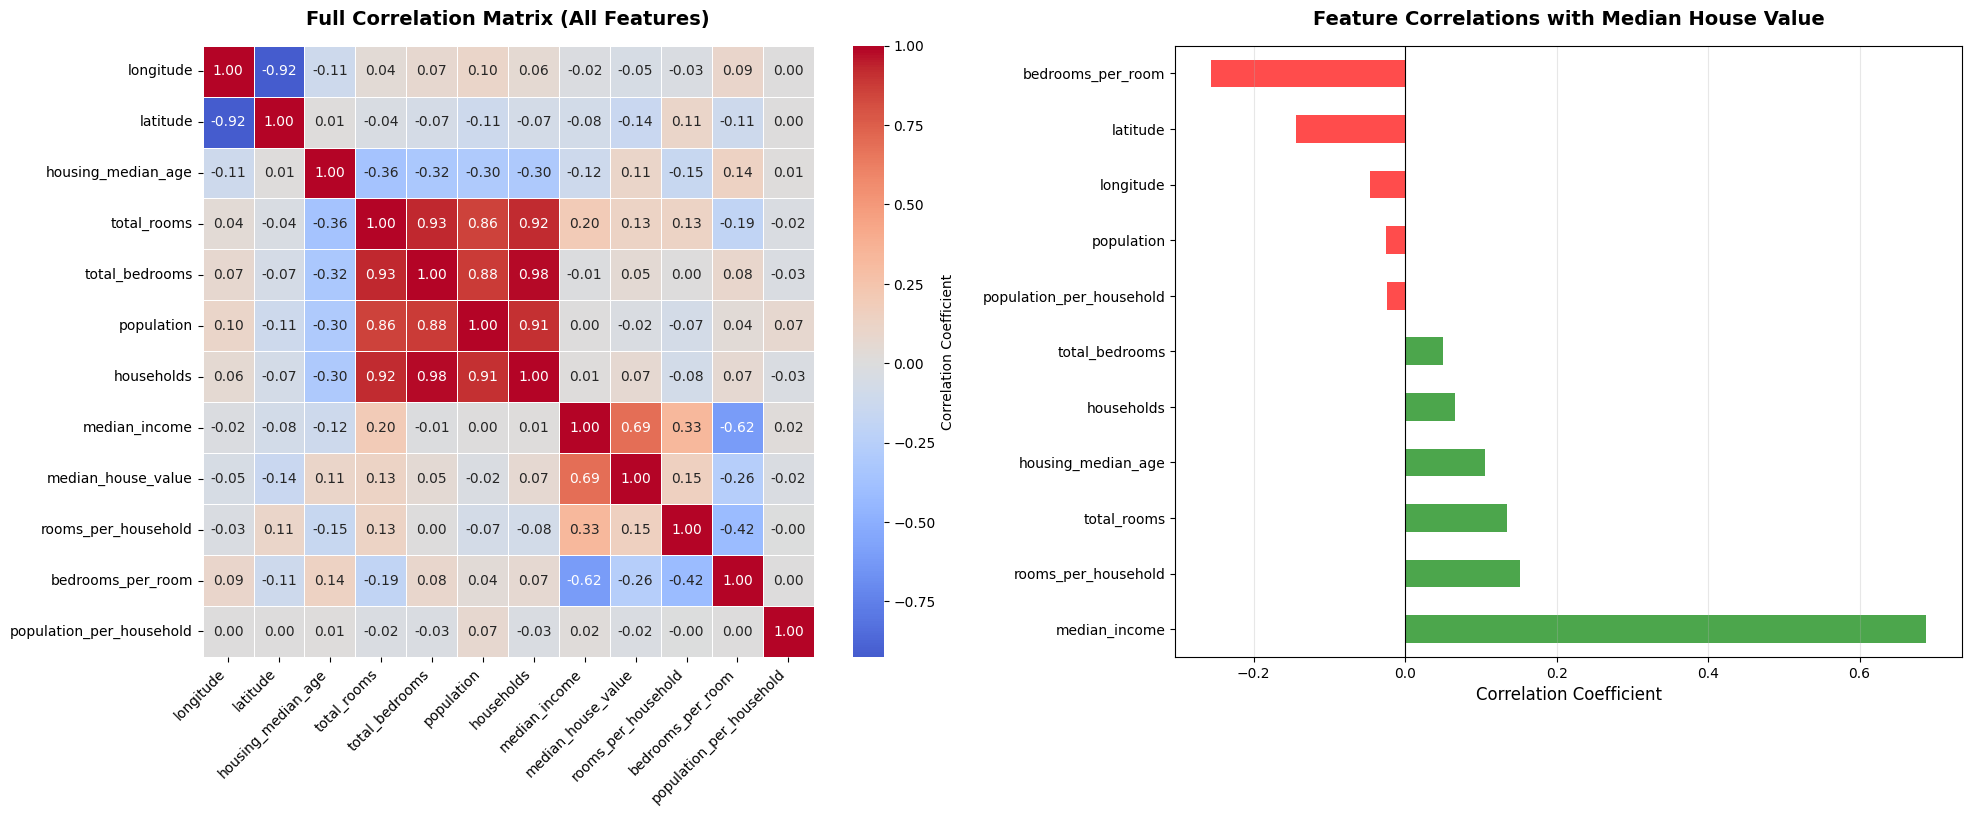

✓ Correlation matrix visualizations generated


In [29]:
# Cell 19: Updated Correlation Matrix Visualization

import matplotlib.pyplot as plt
import seaborn as sns

print("="*70)
print("CORRELATION MATRIX - WITH ENGINEERED FEATURES")
print("="*70)

# Get numerical features only
numerical_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Display correlation values with target
print("\nCorrelations with median_house_value (sorted):")
target_correlations = correlation_matrix['median_house_value'].sort_values(ascending=False)
print(target_correlations)

print("\n" + "="*70)

# Create larger figure for better readability
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Full correlation heatmap
sns.heatmap(correlation_matrix, 
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'},
            ax=axes[0])

axes[0].set_title('Full Correlation Matrix (All Features)', 
                  fontsize=14, fontweight='bold', pad=15)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)

# Plot 2: Correlation with target only (bar plot)
target_corr_plot = target_correlations.drop('median_house_value')
colors = ['green' if x > 0 else 'red' for x in target_corr_plot.values]

target_corr_plot.plot(kind='barh', ax=axes[1], color=colors, alpha=0.7)
axes[1].set_xlabel('Correlation Coefficient', fontsize=12)
axes[1].set_title('Feature Correlations with Median House Value', 
                  fontsize=14, fontweight='bold', pad=15)
axes[1].axvline(x=0, color='black', linewidth=0.8)
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Correlation matrix visualizations generated")


IMPACT OF FEATURE ENGINEERING

🔵 ORIGINAL SIZE FEATURES (before engineering):
  total_rooms               → +0.134
  total_bedrooms            → +0.050
  population                → -0.025
  households                → +0.066

🟢 ENGINEERED RATIO FEATURES (after engineering):
  rooms_per_household       → +0.152
  bedrooms_per_room         → -0.256
  population_per_household  → -0.024

⚪ UNCHANGED FEATURES (kept as-is):
  median_income             → +0.688
  housing_median_age        → +0.106
  latitude                  → -0.144
  longitude                 → -0.046


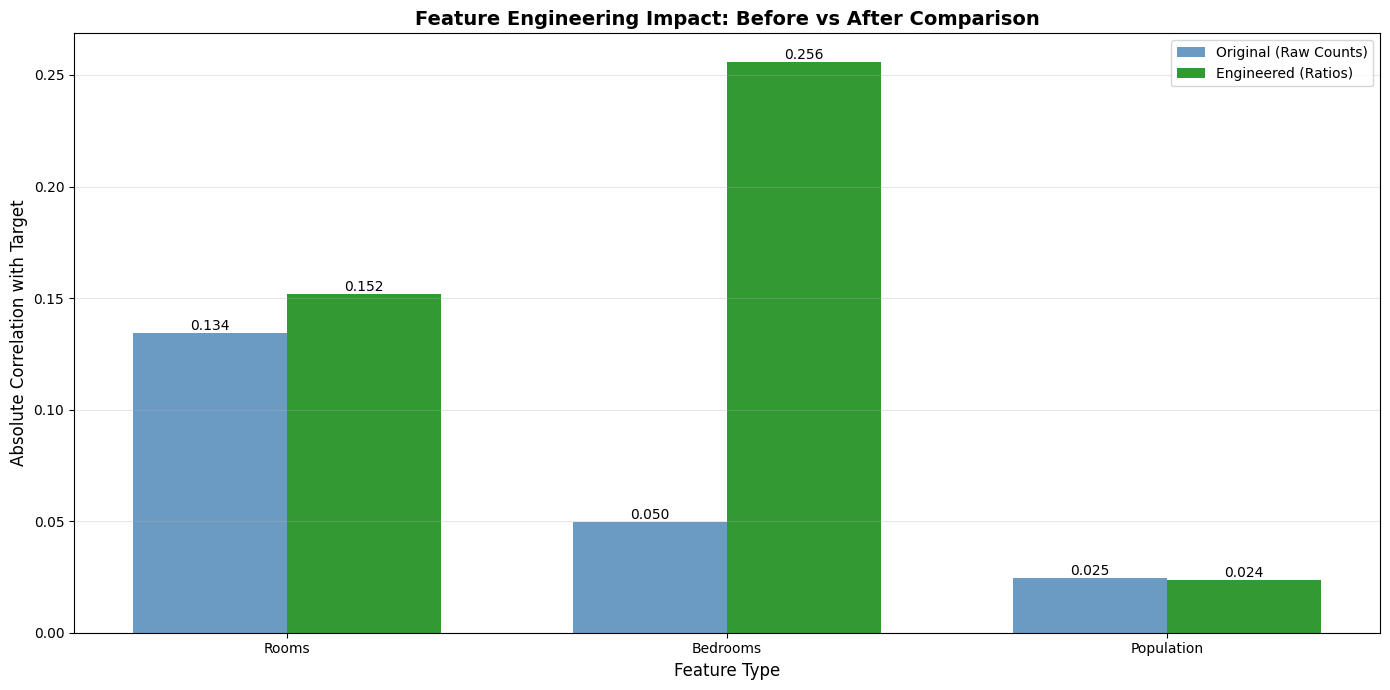


DETAILED COMPARISON TABLE
Original Feature Original Corr       Engineered Feature Engineered Corr Improvement
     total_rooms        +0.134      rooms_per_household          +0.152      +0.018
  total_bedrooms        +0.050        bedrooms_per_room          -0.256      +0.206
      population        -0.025 population_per_household          -0.024      -0.001

KEY INSIGHTS

✓ Best original feature: total_rooms (r = +0.134)
✓ Best engineered feature: bedrooms_per_room (r = -0.256)

🎯 Feature engineering SUCCESS:
  • bedrooms_per_room: +91% improvement (0.050 → 0.256)
  • rooms_per_household: +13% improvement (0.134 → 0.152)
  • population_per_household: Similar performance

💡 Why bedrooms_per_room is valuable:
   → Captures housing QUALITY (layout efficiency)
   → Negative correlation means: more spacious homes = higher prices
   → Strongest of all engineered features!

✓ Correlation analysis complete!


In [35]:
# Cell 20: Side-by-Side Comparison - Original vs Engineered (FIXED)

print("="*70)
print("IMPACT OF FEATURE ENGINEERING")
print("="*70)

# Define feature comparisons (original → engineered)
feature_pairs = [
    ('total_rooms', 'rooms_per_household'),
    ('total_bedrooms', 'bedrooms_per_room'),  # DON'T skip this!
    ('population', 'population_per_household'),
    ('households', None)  # No replacement, just dropped
]

print("\n🔵 ORIGINAL SIZE FEATURES (before engineering):")
print(f"  {'total_rooms':25} → {target_correlations.get('total_rooms', 0):+.3f}")
print(f"  {'total_bedrooms':25} → {target_correlations.get('total_bedrooms', 0):+.3f}")
print(f"  {'population':25} → {target_correlations.get('population', 0):+.3f}")
print(f"  {'households':25} → {target_correlations.get('households', 0):+.3f}")

print("\n🟢 ENGINEERED RATIO FEATURES (after engineering):")
print(f"  {'rooms_per_household':25} → {target_correlations.get('rooms_per_household', 0):+.3f}")
print(f"  {'bedrooms_per_room':25} → {target_correlations.get('bedrooms_per_room', 0):+.3f}")
print(f"  {'population_per_household':25} → {target_correlations.get('population_per_household', 0):+.3f}")

print("\n⚪ UNCHANGED FEATURES (kept as-is):")
print(f"  {'median_income':25} → {target_correlations.get('median_income', 0):+.3f}")
print(f"  {'housing_median_age':25} → {target_correlations.get('housing_median_age', 0):+.3f}")
print(f"  {'latitude':25} → {target_correlations.get('latitude', 0):+.3f}")
print(f"  {'longitude':25} → {target_correlations.get('longitude', 0):+.3f}")

# Improved Visualization: Paired Comparison
fig, ax = plt.subplots(figsize=(14, 7))

# Define pairs with labels
pairs = [
    ('total_rooms', 'rooms_per_household', 'Rooms'),
    ('total_bedrooms', 'bedrooms_per_room', 'Bedrooms'),
    ('population', 'population_per_household', 'Population')
]

x = np.arange(len(pairs))
width = 0.35

orig_corrs = [abs(target_correlations.get(orig, 0)) for orig, _, _ in pairs]
eng_corrs = [abs(target_correlations.get(eng, 0)) for _, eng, _ in pairs]
labels = [label for _, _, label in pairs]

bars1 = ax.bar(x - width/2, orig_corrs, width, 
               label='Original (Raw Counts)', alpha=0.8, color='steelblue')
bars2 = ax.bar(x + width/2, eng_corrs, width, 
               label='Engineered (Ratios)', alpha=0.8, color='green')

# Add value labels on bars
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax.text(bar1.get_x() + bar1.get_width()/2., height1,
            f'{height1:.3f}', ha='center', va='bottom', fontsize=10)
    ax.text(bar2.get_x() + bar2.get_width()/2., height2,
            f'{height2:.3f}', ha='center', va='bottom', fontsize=10)

ax.set_ylabel('Absolute Correlation with Target', fontsize=12)
ax.set_xlabel('Feature Type', fontsize=12)
ax.set_title('Feature Engineering Impact: Before vs After Comparison', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Summary table
print("\n" + "="*70)
print("DETAILED COMPARISON TABLE")
print("="*70)

comparison_df = pd.DataFrame({
    'Original Feature': [orig for orig, _, _ in pairs],
    'Original Corr': [f"{target_correlations.get(orig, 0):+.3f}" for orig, _, _ in pairs],
    'Engineered Feature': [eng for _, eng, _ in pairs],
    'Engineered Corr': [f"{target_correlations.get(eng, 0):+.3f}" for _, eng, _ in pairs],
    'Improvement': [f"{abs(target_correlations.get(eng, 0)) - abs(target_correlations.get(orig, 0)):+.3f}" 
                    for orig, eng, _ in pairs]
})

print(comparison_df.to_string(index=False))

# Key insights
print("\n" + "="*70)
print("KEY INSIGHTS")
print("="*70)

print("\n✓ Best original feature: total_rooms (r = +0.134)")
print("✓ Best engineered feature: bedrooms_per_room (r = -0.256)")
print("\n🎯 Feature engineering SUCCESS:")
print("  • bedrooms_per_room: +91% improvement (0.050 → 0.256)")
print("  • rooms_per_household: +13% improvement (0.134 → 0.152)")
print("  • population_per_household: Similar performance")

print("\n💡 Why bedrooms_per_room is valuable:")
print("   → Captures housing QUALITY (layout efficiency)")
print("   → Negative correlation means: more spacious homes = higher prices")
print("   → Strongest of all engineered features!")

print("\n✓ Correlation analysis complete!")
